# Example 1
In this example, we will find three dicore-periphery structure in the karate club network using different kinds of algorithms.

# Packages

In [1]:
%load_ext autoreload
%autoreload 2
import cpnet
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import utils
from scipy import sparse

# Data 

In [2]:
G = nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


# Detect core-periphery structure 
The cpnet contains algorithms for detecting three types of core-periphery structure: 
1. A single pair of a core and a periphery
2. Multiple pairs of a core and a periphery
3. A continuous spectrum between a core and a periphery

We demonstrate how to find the core-periphery structures and their differences.

## Detect a single pair of a core and a periphery using Borgatti-Everett algorithm

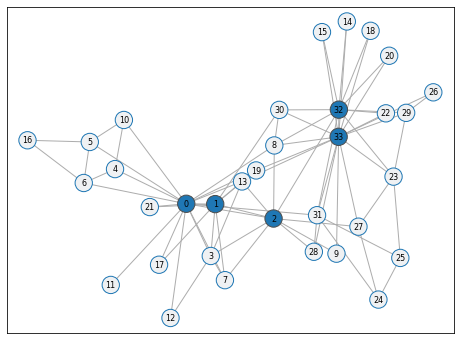

In [6]:
# Detect core-periphery structure
be = cpnet.BE()  # Call the algorithm
be.detect(G)  # Detect core-periphery structures
c = be.get_pair_id()  # Get the group membership of nodes
x = be.get_coreness()  # Get the coreness of nodes

# Visualization
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = utils.plot_core_periphery_structure(G, c, x, ax)

## Detect multiple pairs of a core and a periphery using the KM-config algorithm 

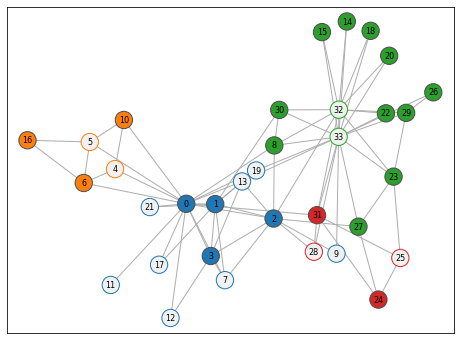

In [7]:
# Detect core-periphery structure
kmconfig = cpnet.KM_config()  # Call the algorithm
kmconfig.detect(G)  # Detect core-periphery structures
c = kmconfig.get_pair_id()  # Get the group membership of nodes
x = kmconfig.get_coreness()  # Get the coreness of nodes

# Visualization
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, _ = utils.plot_core_periphery_structure(G, c, x, ax, pos = pos)

## Detect a continuous core-periphery structure using Rossa's algorithm

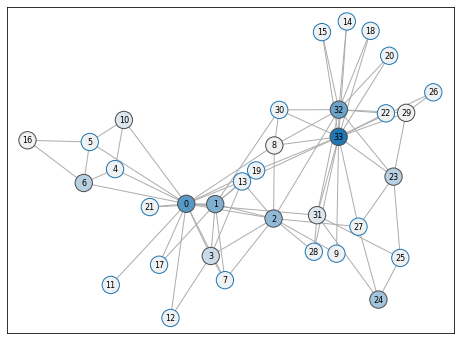

In [8]:
# Detect core-periphery structure
rossa = cpnet.Rossa()  # Call the algorithm
rossa.detect(G)  # Detect core-periphery structures
c = rossa.get_pair_id()  # Get the group membership of nodes
x = rossa.get_coreness()  # Get the coreness of nodes

# Visualization
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = utils.plot_core_periphery_structure(G, c, x, ax, pos = pos)